<a href="https://colab.research.google.com/github/tc3oliver/StratLabFreq/blob/dev/MACD_Divergence_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/StratLabFreq')
os.listdir()

['MACD_Divergence_Analysis.ipynb', 'data', 'TaipeiSansTCBeta-Regular.ttf']

In [6]:
import pandas as pd

In [7]:
dataframe = pd.read_json('./data/BTC_USDT-5m.json')
dataframe.columns=['date', 'open' , 'high', 'low', 'close', 'volume' ]
dataframe['date']=(pd.to_datetime(dataframe['date'],unit='ms'))
dataframe

,date,open,high,low,close,volume
0,2017-08-17 04:00:00,4261.48,4280.56,4261.48,4261.48,2.189061
1,2017-08-17 04:05:00,4261.48,4261.48,4261.48,4261.48,0.000000
2,2017-08-17 04:10:00,4261.48,4261.48,4261.48,4261.48,0.000000
3,2017-08-17 04:15:00,4261.48,4264.88,4261.48,4261.48,0.484666
4,2017-08-17 04:20:00,4264.88,4266.29,4264.88,4266.29,2.328570
...,...,...,...,...,...,...
617219,2023-07-06 05:50:00,30549.80,30569.99,30549.80,30563.11,105.865190
617220,2023-07-06 05:55:00,30563.11,30593.64,30563.11,30582.51,71.446400
617221,2023-07-06 06:00:00,30582.50,30599.30,30573.33,30575.48,88.509370
617222,2023-07-06 06:05:00,30575.48,30575.48,30560.00,30570.04,58.483620


In [8]:
!pip install mplfinance

In [9]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
import matplotlib.font_manager as fm
import matplotlib as mpl

# 下載字體
# !wget https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download -O TaipeiSansTCBeta-Regular.ttf

# 註冊字體
# font_path = 'TaipeiSansTCBeta-Regular.ttf'
# prop = fm.FontProperties(fname=font_path)
# 設定 matplotlib 字體
# mpl.rcParams['font.family'] = prop.get_name()
# font={'font.family': prop.get_name()}
# style=mpf.make_mpf_style(base_mpf_style='default', rc=font)

In [10]:
import random

count = 40

def get_random_count_values_dataframe(df):
    if len(df) < count:
        raise ValueError("DataFrame 中的資料數量不足 40 個")

    start_index = random.randint(0, len(df) - count)

    selected_values = df.iloc[start_index : start_index + count]

    selected_df = pd.DataFrame(selected_values)

    return selected_df

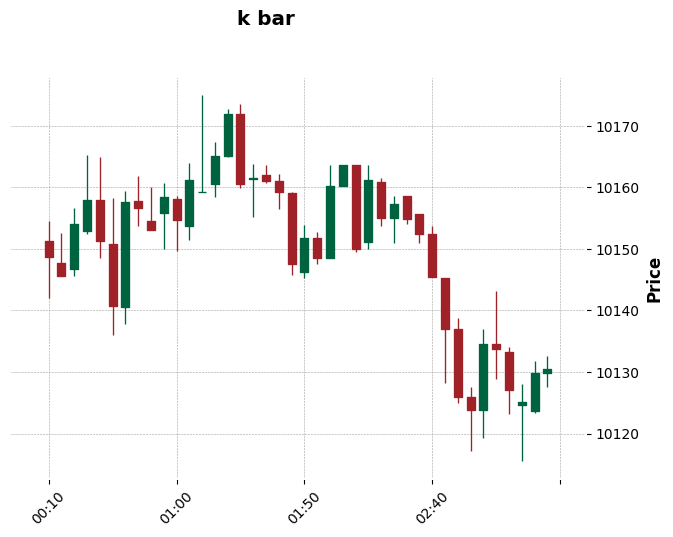

In [13]:
df = get_random_count_values_dataframe(dataframe)

# 將索引設定為 DatetimeIndex
df.set_index('date', inplace=True)

# 繪製 K 線圖
mpf.plot(df, type='candle', style='charles', title='k bar')

# 顯示圖表
plt.show()

In [14]:
url = 'https://anaconda.org/conda-forge/libta-lib/0.4.0/download/linux-64/libta-lib-0.4.0-h166bdaf_1.tar.bz2'
!curl -L $url | tar xj -C /usr/lib/x86_64-linux-gnu/ lib --strip-components=1
url = 'https://anaconda.org/conda-forge/ta-lib/0.4.19/download/linux-64/ta-lib-0.4.19-py310hde88566_4.tar.bz2'
!curl -L $url | tar xj -C /usr/local/lib/python3.10/dist-packages/ lib/python3.10/site-packages/talib --strip-components=3
import talib


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4295    0  4295    0     0  16045      0 --:--:-- --:--:-- --:--:-- 16026
100  517k  100  517k    0     0   808k      0 --:--:-- --:--:-- --:--:--  808k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4335    0  4335    0     0  12597      0 --:--:-- --:--:-- --:--:-- 12638
100  392k  100  392k    0     0   516k      0 --:--:-- --:--:-- --:--:-- 2282k


In [15]:
import talib.abstract as ta

In [16]:
macd = ta.MACD(dataframe, fastperiod=13, slowperiod=34)
dataframe['macdhist'] = macd['macdhist']

In [93]:
# 尋找三個峰值且這些波峰連續升高
def find_peak_sequence(data):
    peaks_index = []
    wave = []

    for i in range(len(data)):
        if i == len(data) - 1:
            break
        d = abs(data[i])
        if len(wave) == 0 or d > wave[-1]:
            wave.append(d)
        else:
            if len(wave) > 1:
                peaks_index.append(i-1)
            wave = [d]

    if len(wave) > 0:
        peaks_index.append(i)

    highlighted_points = [(index, data[index]) for index in peaks_index]

    temp = highlighted_points[-1]
    highlighted_points = highlighted_points[:-1]
    highlighted_points = [n for n in highlighted_points if n[1] < 0]
    highlighted_points = sorted(
        highlighted_points, key=lambda x: abs(x[1]), reverse=True)[:2]
    highlighted_points = sorted(
        highlighted_points, key=lambda x: x[0], reverse=False)
    highlighted_points.append(temp)

    if len(highlighted_points) >= 3:
        if abs(highlighted_points[-3][1]) > abs(highlighted_points[-2][1]) > abs(highlighted_points[-1][1]):
                return True, highlighted_points

    return False, []

# 多單條件檢查 零軸以下的 MACD 柱狀體應該大於 windows 的一半
def find_peak_sequence_logn_wrapper(data):
  if data[-1] > 0:
    return False, []
  count = sum(1 for value in data if value < 0)
  if count < (len(data) / 2):
      return False, []
  return find_peak_sequence(data)

[-2.6791752641953437, -2.242741600229504, -2.044277891431042, -2.5778134909544566, -2.587531431077709, -2.6824957909439497, -3.157874136983483, -3.1827596828133684, -2.6042456187242005, -2.153108935230529, -1.7866654641084967, -0.9036000208886223, -0.32058094292128025, 0.04965314836638424, 0.5200114104551368, 1.317707318291374, 1.6019850431591447, 1.523171791810249, 0.5633465666460493, 0.5572374320865627, -0.7481005422325584, -1.3229727626074084, -2.2568059668423546, -2.6495637923445807, -1.9642542644230279, -1.6024175296397245, -1.3124882540563485, -0.8166094611954584, -0.4114801352736692, 0.4687734923032689, 0.34323687531694835, -1.181097973105726, -1.4486879943356405, -1.570974562265131, -1.866234154379216, -1.6460512071285183, -1.644274356618936, -1.5753846952396426, -0.8540254957176054, -0.4295894233580254]
[(7, -3.1827596828133684), (23, -2.6495637923445807), (39, -0.4295894233580254)]


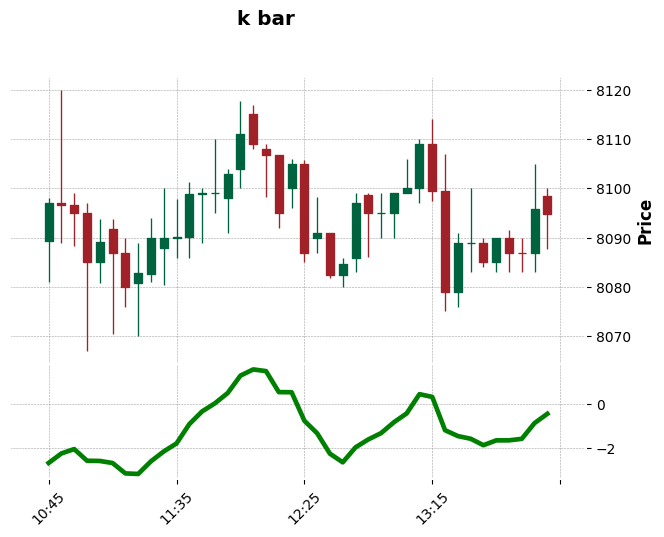

In [94]:
while True:
  df = get_random_count_values_dataframe(dataframe)
  data = df['macdhist'].values.tolist()

  isfind, l = find_peak_sequence_logn_wrapper(data)


  if isfind:
    print(data)
    print(l)
    df.set_index('date', inplace=True)

    # 建立一個 MACD histogram 的圖像
    ap = mpf.make_addplot(df['macdhist'], panel=1, color='g', secondary_y=False)

    # 繪製 K 線圖，並添加 MACD histogram
    mpf.plot(df, type='candle', style='charles', title='k bar', addplot=ap)

    # 顯示圖表
    plt.show()

    break